## Importing useful Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()
# SibSp. -> siblings/spouse
# Parch -> parent/child
# Pclass -> Passenger class (1-Richest, 2-Middle, 3-Poor)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis (EDA)

### Handling Missing data


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

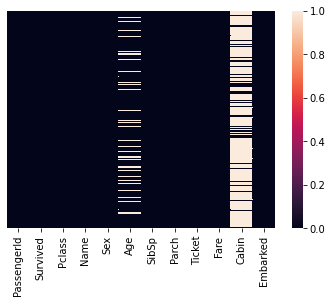

In [7]:
# Can you visulize the missing data with the help of seaborn library
sns.heatmap(train.isnull(), yticklabels=False)

Observation -> Around 20% of age data and 80% of cabin data is missing. For age, we can replace the missing values with some suitable number while for cabin, we can either drop the whole column or replace the entries with 0 or 1.

<AxesSubplot:xlabel='Survived', ylabel='count'>

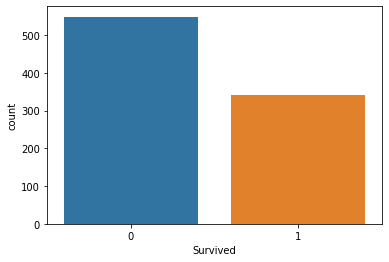

In [8]:
# Let's now visually see how many people survived.
sns.countplot(x="Survived", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

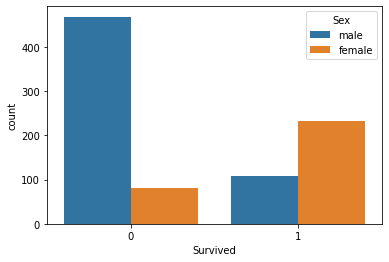

In [9]:
sns.countplot(x="Survived", data=train, hue="Sex")

In [10]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

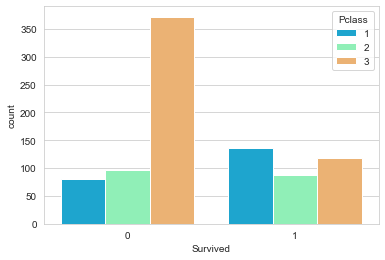

In [11]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue = "Pclass", palette="rainbow")

c:\users\neeraj kumar singh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

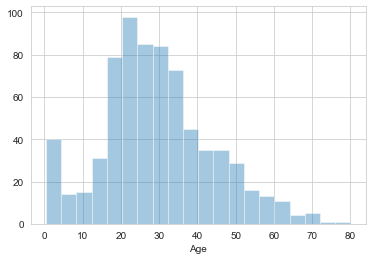

In [12]:
sns.distplot(train["Age"], kde = False)

Most passengers have age range between 15-35

<AxesSubplot:xlabel='SibSp', ylabel='count'>

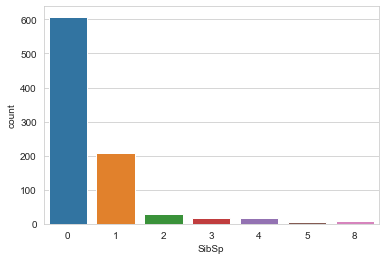

In [13]:
# How many siblings/spouse were in the titanic?
sns.countplot(x="SibSp", data=train)

Most passengers don't have any siblings or spouse.

### Data Cleaning

#### Handling age missing values 
Since the numbers of nan value in age is less (lesser than 20%), I can replace the nan values with some mean or median values. Also, I will do this replacement on the basis of passenger class.

In [14]:
# Finding correlation between numerical variables
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

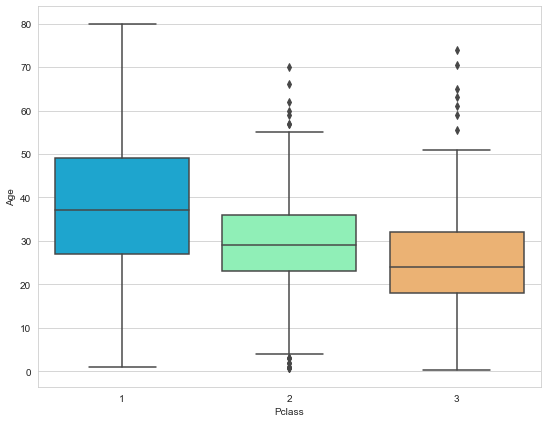

In [15]:
plt.figure(figsize=(9, 7))
sns.boxplot(x="Pclass", y="Age", data= train, palette="rainbow")

Median values:

    Pclass = 1, median = 37
    
    Pclass = 2, median = 29
    
    Pclass = 3, median = 24

In [16]:
pd.isnull(train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [17]:
# Defining a function for replacing nan age values
def age_impute(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [18]:
train["Age"] = train[['Age', 'Pclass']].apply(age_impute, axis = 1)

In [19]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

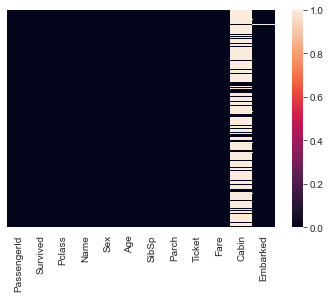

In [20]:
sns.heatmap(train.isnull(), yticklabels=False)

In [21]:
# Handled the nan values in Age

#### Handling cabin missing values

In [22]:
# Since, there are a lot of missing values in cabin, we will drop the entire column

In [23]:
train.drop("Cabin", axis= 1, inplace = True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [4]:
train.dropna(inplace = True)

In [5]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# Now, we don't have any missing values

### Converting Categorical Features
Need to provide some numerical representation to categorical features. For that we will use one hot encoding.

In [7]:
train["Embarked"].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

In [8]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [9]:
train.drop(["Embarked", "Sex", "Name", "Ticket"], axis = 1, inplace = True)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
1,2,1,1,38.0,1,0,71.2833,C85
3,4,1,1,35.0,1,0,53.1000,C123
6,7,0,1,54.0,0,0,51.8625,E46
10,11,1,3,4.0,1,1,16.7000,G6
11,12,1,1,58.0,0,0,26.5500,C103


In [11]:
# Concanating sex and embark column in the dataframe
train = pd.concat([train, sex, embark], axis = 1)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


##### Our data is ready now!

## Building Models 

### Train-Test Split

In [35]:
# Survived column is our dependent features and all other are independent features

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis = 1), train["Survived"]
                                                   , test_size=0.3, random_state=0)

In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
618,619,2,4.0,2,1,39.0000,F4,0,0,1
245,246,1,44.0,2,0,90.0000,C78,1,1,0
536,537,1,45.0,0,0,26.5500,B38,1,0,1
136,137,1,19.0,0,2,26.2833,D47,0,0,1
789,790,1,46.0,0,0,79.2000,B82 B84,1,0,0
...,...,...,...,...,...,...,...,...,...,...
512,513,1,36.0,0,0,26.2875,E25,1,0,1
336,337,1,29.0,1,0,66.6000,C2,1,0,1
577,578,1,39.0,1,0,55.9000,E44,0,0,1
268,269,1,58.0,0,1,153.4625,C125,0,0,1


In [18]:
X_train.shape

(128, 10)

In [19]:
X_test.shape

(55, 10)

In [20]:
type(y_train)

pandas.core.series.Series

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\users\neeraj kumar singh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

### Model testing

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
scr = accuracy_score(y_test, y_pred)
print(cm)
print(scr)

[[132  25]
 [ 37  73]]
0.7677902621722846


In [43]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

## Evaluation

In [44]:
# For getting precision, recall, f1-score and support, Classification report can be used

In [45]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       157
           1       0.74      0.66      0.70       110

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267

